     websdr.ewi.utwente.nl  google.com  vnexpress.net  youtube.com  \
0               14405881.0     23105.0        52199.0      27418.0   
1               14513211.0     19654.0            NaN       8578.0   
2               27335989.0     25918.0            NaN       8090.0   
3               17273982.0     19306.0            NaN       6497.0   
4               12464068.0     20080.0            NaN       7294.0   
..                     ...         ...            ...          ...   
101             19282483.0     17782.0            NaN          NaN   
102             14543172.0     17680.0            NaN          NaN   
103             15408998.0     12778.0            NaN          NaN   
104             15504467.0     28694.0            NaN          NaN   
105             25698760.0     23902.0            NaN          NaN   

     dxheat.com  godlikeproductions.com  reddit.com  techsupportalert.com  \
0       20831.0                  8782.0      8101.0                5140.0   
1    

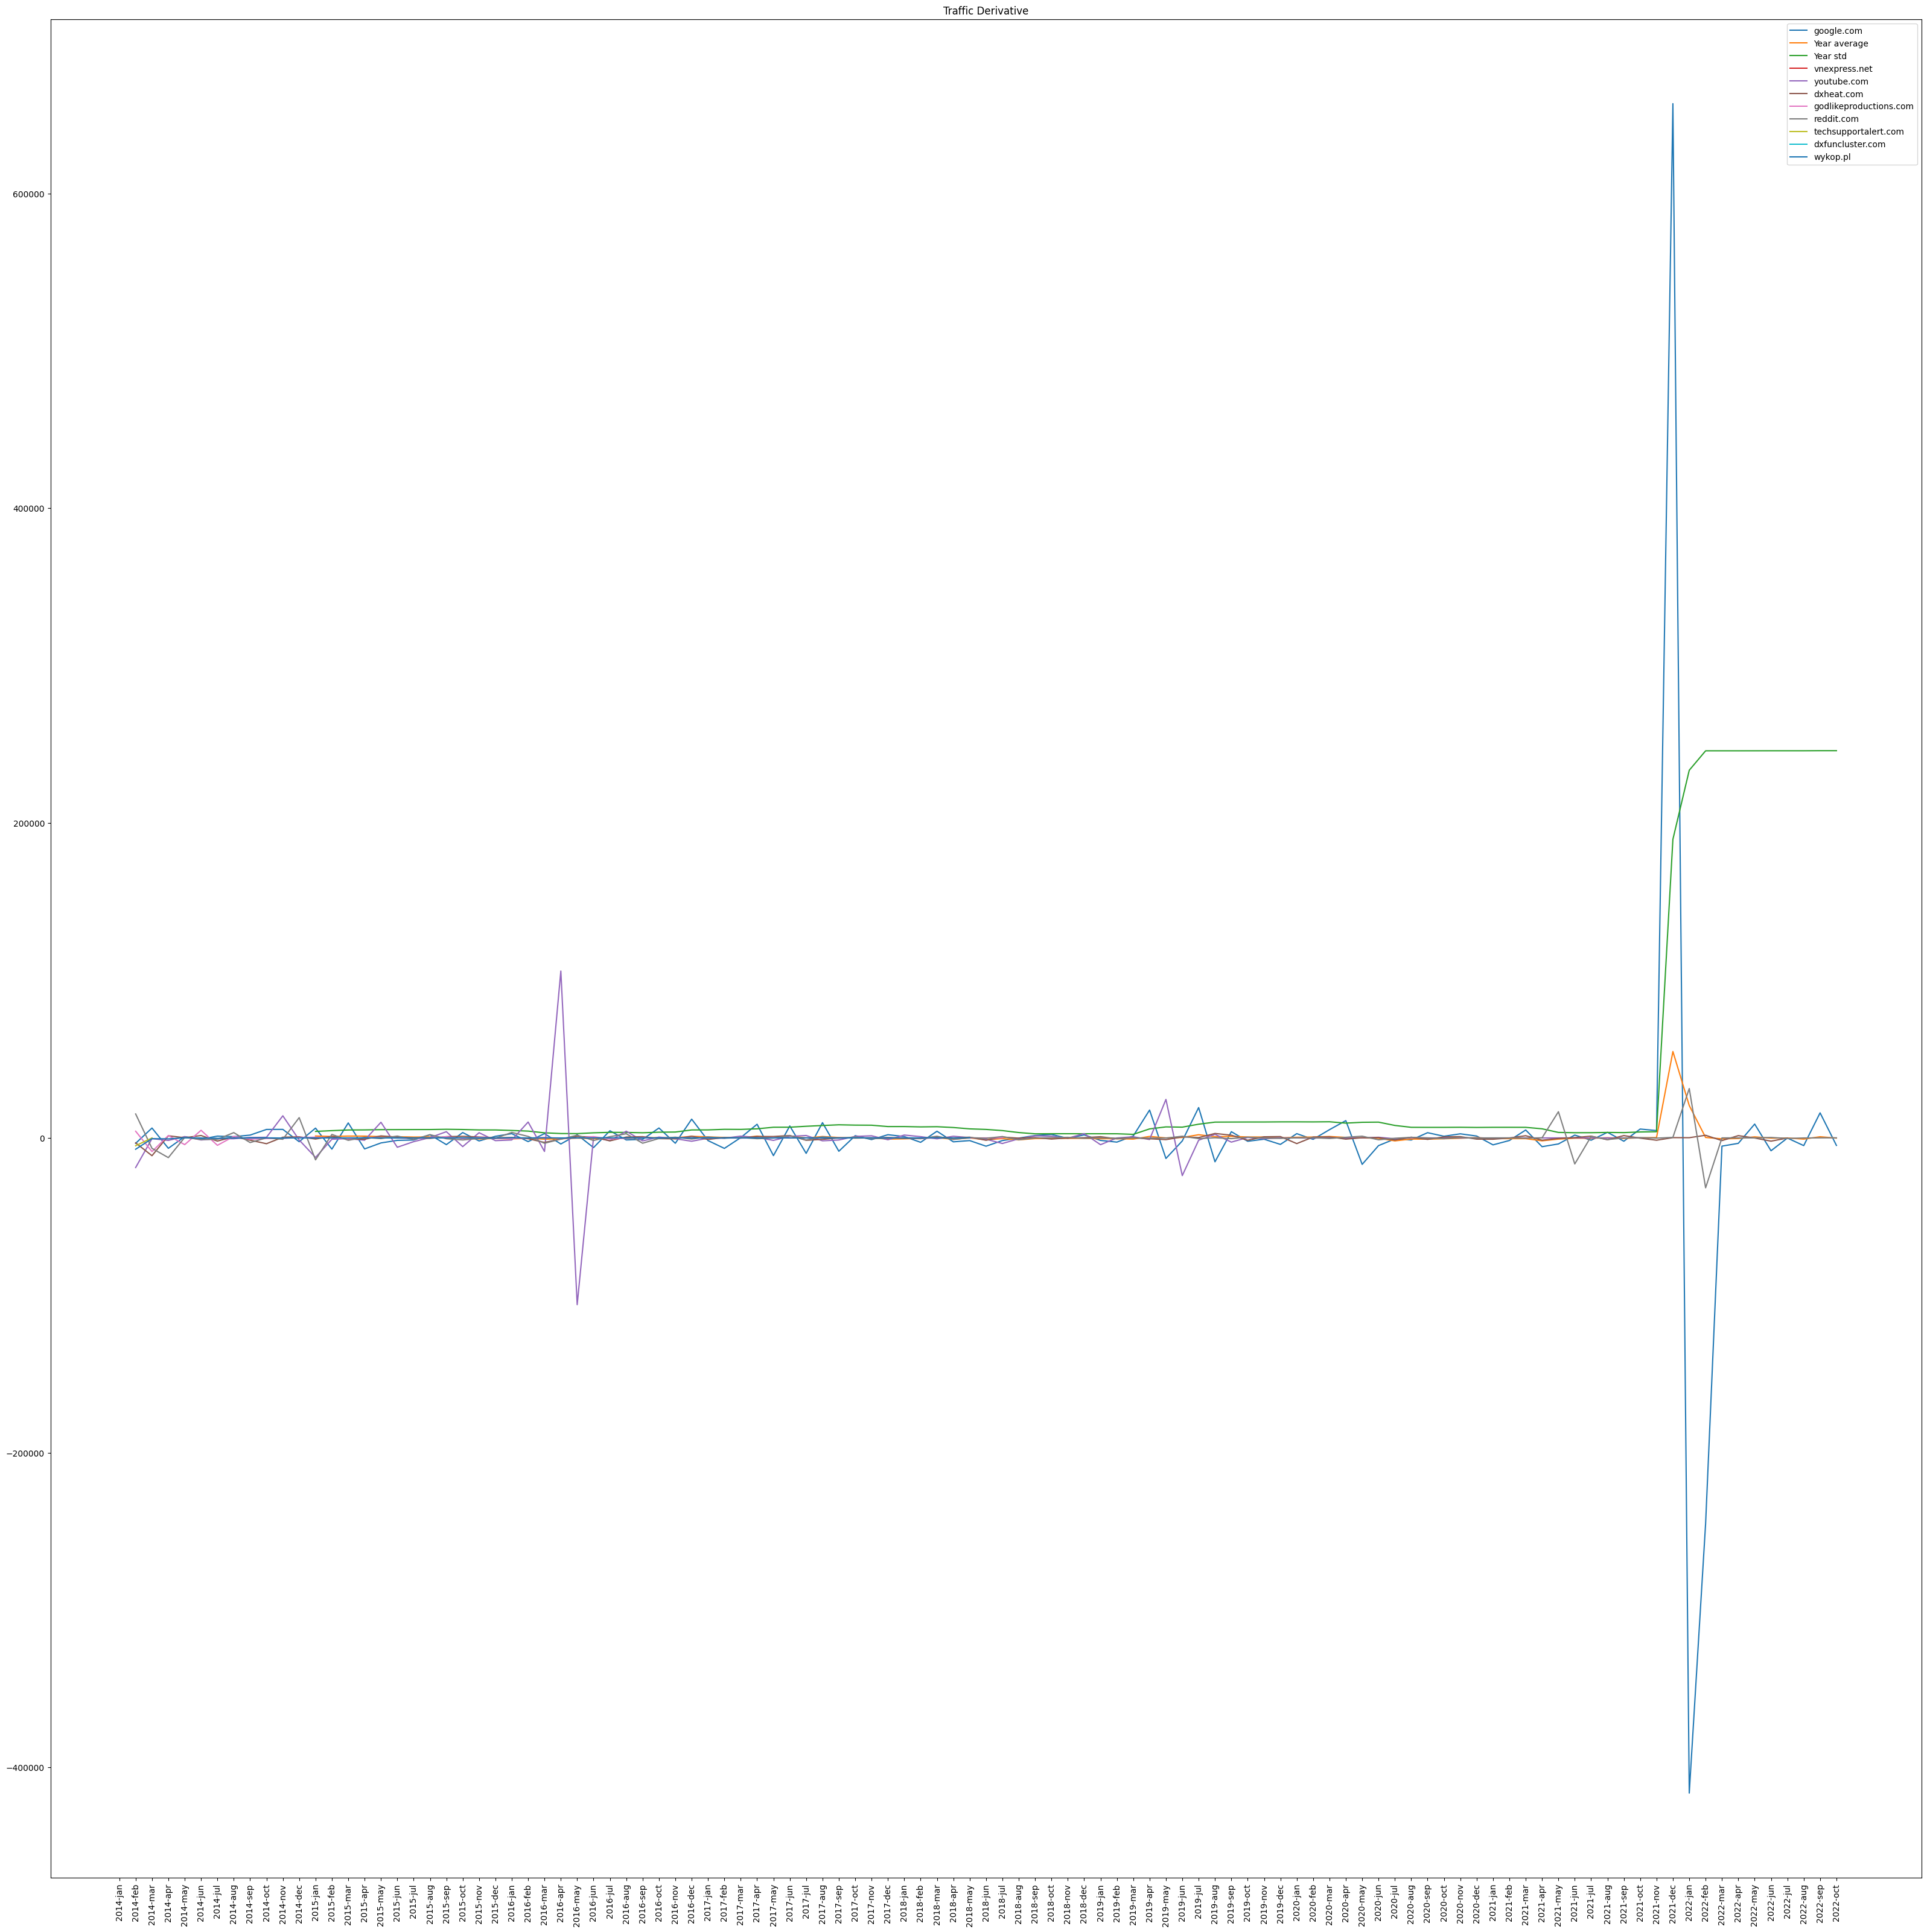

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from collections import defaultdict
from collections import Counter
from scipy import signal
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

data_file_name = "referrer-monthly-top100.csv"

#Processing the dataframe from the csv file

df = pd.read_csv(data_file_name,index_col=False)

df = df.iloc[: , 1:]

year = df.iloc[0].values.flatten().tolist()
month = df.iloc[1].values.flatten().tolist()

df = df.iloc[2:]

df = df.reset_index(drop=True)

for i in range(0,106):
    df[str(i)] = list(zip(df.iloc[:,i], df.iloc[:,i+106]))

df = df.iloc[: , 212:]
urls = [] 

urls = df.stack().tolist()
def Convert(tup, di):
    for a, b in tup:
        di.setdefault(a, []).append(b)
    return di


dictionary = {}
dictionary = Convert(urls, dictionary)

df2 = pd.DataFrame.from_dict(dictionary, orient='index').T

#Adding total number of counts per month

df2['total']= df2.sum(axis=1)
print(df2)
del month[-106:]
del year[-106:]
df2['month'] = month
df2['year'] = year

alltime_std = df2.std()

#set the main url 
df3 = df2['google.com']

# detrend by taking the difference with the previous month
derivative = df3[1:] - df3.values[:-1]
plt.plot(derivative, label=df3.name)

der_moving_average = derivative.rolling(window=12).mean()

der_moving_std = derivative.rolling(window=12).std()

plt.plot(der_moving_average, label="Year average")

plt.plot(der_moving_std, label="Year std")


#detrend the other urls 
for i in range(2,10):
    data = df2.iloc[:, i]
    derivative = data[1:] - data.values[:-1]
    plt.plot(derivative, label=df2.columns[i])

plt.title("Traffic Derivative")
plt.rcParams["figure.figsize"] = (20,10)


dates = ['-jan',
    '-feb',
    '-mar',
    '-apr',
    '-may',
    '-jun',
    '-jul',
    '-aug',
    '-sep',
    '-oct',
    '-nov',
    '-dec']
fullListDates = []
for i in range(2014,2023):
    as_string = str(i)
    
    for j in range(len(dates)):

        fullListDates.append(as_string + dates[j])
        if as_string == "2022" and j == 9:
            break


dates_x= pd.Series(fullListDates)

plt.xticks(ticks=[j for j in range(0,106)], labels=dates_x, rotation=90)
fig = plt.gcf()
fig.set_size_inches(40,40)
# plt.yscale('log')

plt.legend()
plt.show()
